I recently wrote a two part article on some of the advanced plots in Matploltib.I am sharing some of the code snippets here but incase you want a more detailed read, you can read the articles here:

* [Advanced plots in Matplotlib — Part 1](https://parulpandey.com/2020/08/04/advanced-plots-in-matplotlib%e2%80%8a-%e2%80%8apart-1/)
* [Advanced plots in Matplotlib - Part 2](https://parulpandey.com/2020/08/17/advanced-plots-in-matplotlib%e2%80%8a-%e2%80%8apart-2/)

The basic capabilities of the Matplotlib library, including the ability to create bar graphs, histograms, pie charts, etc. are well known. However, in this article, I will showcase some of the advanced plots in matplotlib, which can take our analysis a notch higher.

Also here is a handy cheatsheet provides an excellent glimpse of the various functionalities of Matplotlib.

![](https://parulpandeycom.files.wordpress.com/2020/08/0-1-1.jpeg?w=600)

Matplotlib cheat sheet. Full image: https://lnkd.in/dD5fE8V

Load the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import numpy as np

# 1. Span Selector

[Span Selector](https://matplotlib.org/3.1.1/gallery/widgets/span_selector.html) is a mouse widget in matplotlib.Span Selector returns the maximum and minimum values of a selected region in a graph, through the mouse selection.

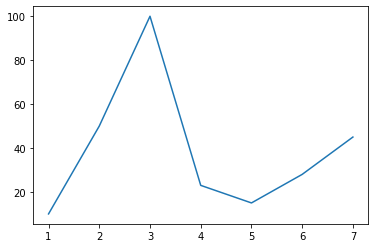

In [2]:
from matplotlib.widgets import SpanSelector
def onselect(xmin, xmax):
            print(xmin, xmax)
            return xmin, xmax
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7], [10, 50, 100, 23,15,28,45])
span = SpanSelector(ax, onselect, 'horizontal', useblit=True,  rectprops=dict(alpha=0.5, facecolor='red'))
plt.show()

The interactivity cannot be shown in the notebook hence I am enclosing a gif.

![](https://parulpandeycom.files.wordpress.com/2020/08/1_ewseu1uciu4rd9odu4rfjg-2.gif?w=1024)

# 2. Broken Barh - Broken Horizontal Bar plot

A “broken” horizontal bar plot is used in situations when the data has values that vary considerably — for instance, a dataset consisting of extreme temperature ranges

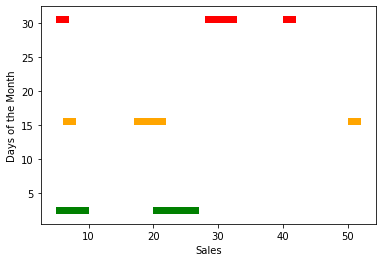

In [3]:
#Defining the x and y ranges
xranges = [(5,5), (20,5),(20,7)]
yrange = (2,1)
#Plotting the broken bar chart
plt.broken_barh(xranges, yrange, facecolors='green')
xranges = [(6,2), (17,5),(50,2)]
yrange = (15,1)
plt.broken_barh(xranges, yrange, facecolors='orange')
xranges = [(5,2), (28,5),(40,2)]
yrange = (30,1)
plt.broken_barh(xranges, yrange, facecolors='red')
plt.xlabel('Sales')
plt.ylabel('Days of the Month')
plt.show()

# 3. Table Demo

Displaying Table within a plot using the [table function](https://matplotlib.org/3.2.1/gallery/misc/table_demo.html)

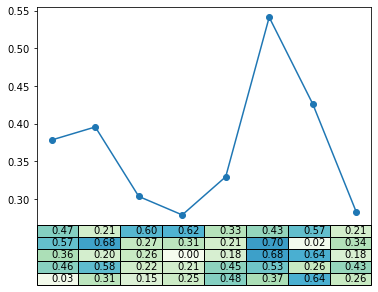

In [4]:
# The following example has been taken from a tweet by Just Glowing Python(@JustGlowing) 
x = np.random.rand(5, 8)*.7
plt.plot(x.mean(axis=0), '-o', label='average per column')
plt.xticks([])
 
plt.table(cellText=[['%1.2f' % xxx for xxx in xx] for xx in x],cellColours=plt.cm.GnBu(x),loc='bottom')
 
plt.show()

# 4.Watermarking Images with Matplotlib

In [5]:
df = pd.read_csv('../input/forbes-highest-paid-athletes-19902019/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2019).csv')
im = image.imread('../input/profile-pics/LeBron.jpeg') # Image


In [6]:
lebron_james = df[df['Name']=='LeBron James']

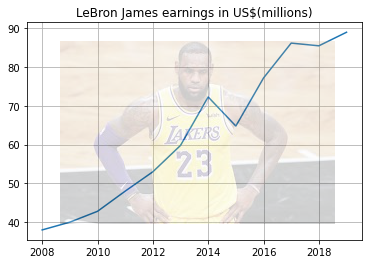

In [7]:
fig, ax = plt.subplots()
ax.grid()
ax.plot('Year','earnings ($ million)',data=lebron_james)
ax.set_title("LeBron James earnings in US$(millions)")
fig.figimage(im, 60, 40,cmap='ocean', alpha=.2)
plt.show()


# 5.Event Plots

Event plots come in handy when one wants to plot identical parallel lines at pre-defined positions.Such plots are commonly used in neuroscience to display the spiking activity of the neurons over time,

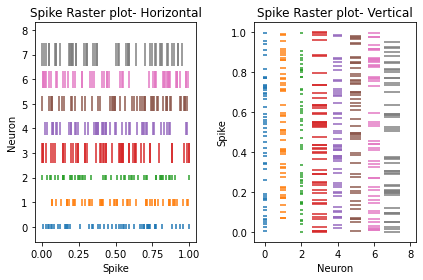

In [8]:
# Creating rows of random data with 50 data points
data = np.random.random([8, 50])
colorsCodes = ['C{}'.format(i) for i in range(8)]
                
 
# Set spike colors for each neuron
lineSize = [.2, 0.3, 0.2, 0.8, 0.5, 0.6, 0.7, 0.9]                                  
fig, ax = plt.subplots(1, 2)
         
# Creating a horizontal plot
 
ax[0].eventplot(data, color=colorsCodes, linelengths = lineSize) 
ax[0].set_title('Spike Raster plot- Horizontal')
ax[0].set(xlabel="Spike",ylabel="Neuron")
ax[1].eventplot(data, color=colorsCodes, linelengths = lineSize, orientation='Vertical')     
ax[1].set_title('Spike Raster plot- Vertical')
ax[1].set(ylabel="Spike",xlabel="Neuron")
plt.tight_layout()
plt.show() 

# 6. Timelines

Creating a timeline plot with Matplotlib. Here is a timeline showing the Android version history using the code provided in the official [documentation](https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/timeline.html).

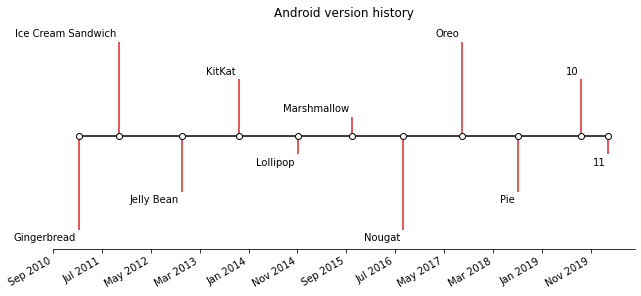

In [9]:
import matplotlib.dates as mdates
from datetime import datetime
 
names = ['Gingerbread', 'Ice Cream Sandwich', 'Jelly Bean', 'KitKat', 'Lollipop', 'Marshmallow',
             'Nougat', 'Oreo', 'Pie', '10', '11']
dates = ['2011-02-9', '2011-10-19', '2012-11-13', '2013-10-31',
             '2014-11-3', '2015-10-5', '2016-08-22', '2017-08-21',
             '2018-08-06', '2019-09-3', '2020-02-19']
 
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
 
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]
 
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Android version history")
markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
plt.setp(markerline, mec="k", mfc="w", zorder=3)
 
# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))
 
# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")
 
# format xaxis with 10 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=10))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
 
# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)
ax.margins(y=0.1)
plt.show()

# 7. Bar of Pie

Have you ever wanted to further drill down into a pie chart? Maybe you wanted to expand one of its slices and ‘explode’ it into a bar chart? Matplotlib makes it possible through a ‘Bar of Pie’ functionality. It uses a [ConnectionPatch that connects two points (possibly in different axes](https://matplotlib.org/api/_as_gen/matplotlib.patches.ConnectionPatch.html#matplotlib-patches-connectionpatch))). Here is an example from the [official documentation](https://matplotlib.org/gallery/pie_and_polar_charts/bar_of_pie.html?highlight=bar%20pie).

![](https://parulpandeycom.files.wordpress.com/2020/08/pie.png)

# 8. [adjustText](https://github.com/Phlya/adjustText) — automatic label placement for matplotlib

A lot of times, we struggle to adjust the text positions in a graph. This happens when there are multiple labels, and these labels start overlapping. adjustText is a pretty useful library for such situations as it automates the placement of labels.

In [10]:
!pip install adjustText



  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=da719451e933516623248eb8f583e2f62a7175381a478ffdf29e2004959dfb85
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


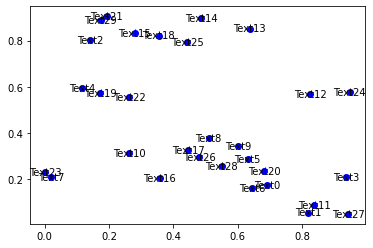

In [11]:
# Before calling adjusttext

x, y = np.random.random((2,30))
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]

500

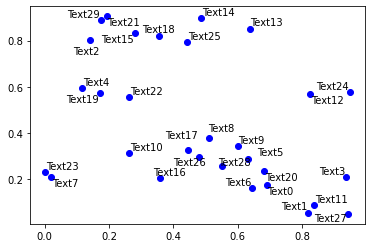

In [12]:
# calling adjusttext

from adjustText import adjust_text
fig, ax = plt.subplots()
plt.plot(x, y, 'bo')
texts = [plt.text(x[i], y[i], 'Text%s' %i, ha='center', va='center') for i in range(len(x))]
adjust_text(texts)

# 9 Matplotlib XKCD Plots

Well, if you want to add some twist to your matplotlib plots, you can simply call the xkcd()method on the pyplot object as follows. Here we are working with GDP dataset of India, which shows the GDP growth rate percentage from 2010 from 2019.

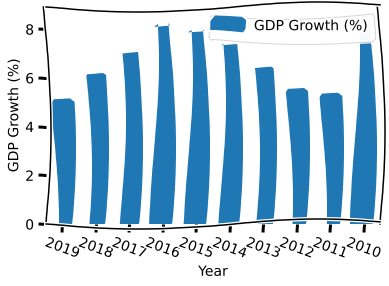

<Figure size 720x576 with 0 Axes>

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/parulnith/Website-articles-datasets/master/India%20GDP%20Growth%20Rate%20.csv', parse_dates=['Year'])
df['Year'] = df['Year'].apply(lambda x: pd.Timestamp(x).strftime('%Y'))
 
#calling xkcd() method
plt.xkcd(scale=5, length=400)
df.plot(x='Year',y='GDP Growth (%)',kind='bar')
plt.ylabel('GDP Growth (%)')
plt.xticks(rotation=-20)
plt.figure(figsize=(10,8))
plt.show()

# 10. CyberPunk Style

[mplcyberpunk](https://github.com/dhaitz/mplcyberpunk), which is a Python package on top of matplotlib to create ‘cyberpunk’ style plots with just three additional lines of code.

In [14]:
!pip install mplcyberpunk

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


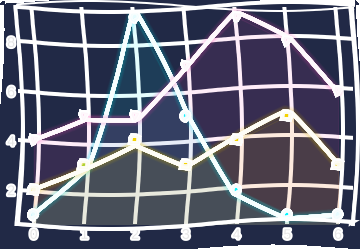

In [15]:
import mplcyberpunk
plt.style.use("cyberpunk")
 
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
 
# Add glow effects-Optional
mplcyberpunk.add_glow_effects()


![](https://parulpandeycom.files.wordpress.com/2020/08/punk1-1.png)